# Time Series

Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time.

In [1]:
import pandas as pd
import numpy as np
import warnings
import itertools
import requests
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
car = pd.read_csv('monthly-car-sales.csv')

In [3]:
car.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [4]:
car.tail()

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


In [5]:
car.shape

(108, 2)

In [6]:
car.describe()

,Sales
count,108.000000
mean,14595.111111
std,4525.213913
min,5568.000000
25%,11391.250000
50%,14076.000000
75%,17595.750000
max,26099.000000


In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [8]:
car1 = car
car1.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [9]:
car1.tail()

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


In [10]:
car1.drop(['Month'],axis = 1, inplace = True)
car1.head()

,Sales
0,6550
1,8728
2,12026
3,14395
4,14587


In [11]:
car1.shape

(108, 1)

In [12]:
import calendar

In [13]:
date = pd.date_range(start="1960-01-01", freq = 'MS',periods=len(car1)) # MS : Monthly

In [14]:

date

DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01',
               ...
               '1968-03-01', '1968-04-01', '1968-05-01', '1968-06-01',
               '1968-07-01', '1968-08-01', '1968-09-01', '1968-10-01',
               '1968-11-01', '1968-12-01'],
              dtype='datetime64[ns]', length=108, freq='MS')

In [15]:
car1['Year']=date.year

In [16]:
car1.head()

,Sales,Year
0,6550,1960
1,8728,1960
2,12026,1960
3,14395,1960
4,14587,1960


In [17]:
car1['Month']=date.month
car1['Month']=car1['Month'].apply(lambda x : calendar.month_abbr[x])
car1.head()

,Sales,Year,Month
0,6550,1960,Jan
1,8728,1960,Feb
2,12026,1960,Mar
3,14395,1960,Apr
4,14587,1960,May


In [18]:
car1 = car1[['Month','Year','Sales']] ### Changing sequence

In [19]:
car1.head()

,Month,Year,Sales
0,Jan,1960,6550
1,Feb,1960,8728
2,Mar,1960,12026
3,Apr,1960,14395
4,May,1960,14587


In [20]:
# Set Index so that data is usable for time series
car1.set_index(date, inplace=True)

In [21]:
car1.head()

,Month,Year,Sales
1960-01-01,Jan,1960,6550
1960-02-01,Feb,1960,8728
1960-03-01,Mar,1960,12026
1960-04-01,Apr,1960,14395
1960-05-01,May,1960,14587


In [22]:
#Create a new container for Only Sales and Index
car_ts = car1['Sales']

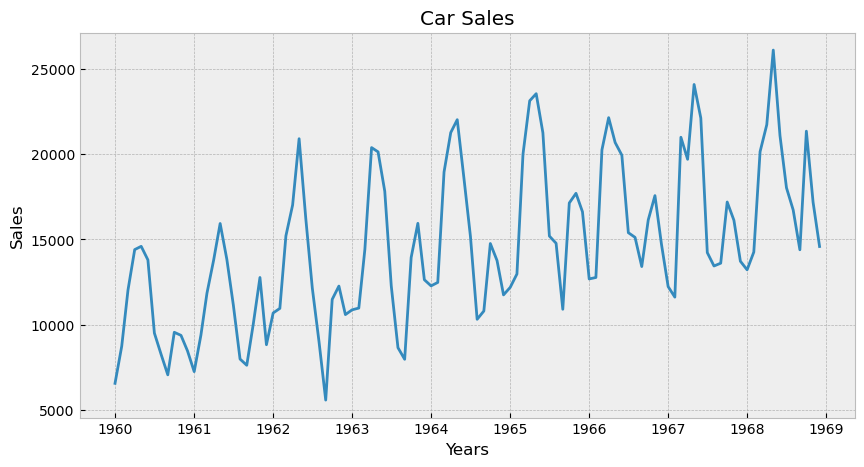

In [23]:
#Plot The TS
plt.figure(figsize=(10,5))
plt.plot(car_ts)
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Car Sales')
plt.show()

### If time series has a repeating pattern within a year, then it has seasonality.As we can see there is seasonality in our data

In [24]:
# Add Rolling Statistics like Mean and SD for further analysis
rolmean = car_ts.rolling(window = 12).mean()
# 12 month rolling average for studying trend
rolstd  = car_ts.rolling(window = 12).std()
# 12 month rolling std dev for studying Variation

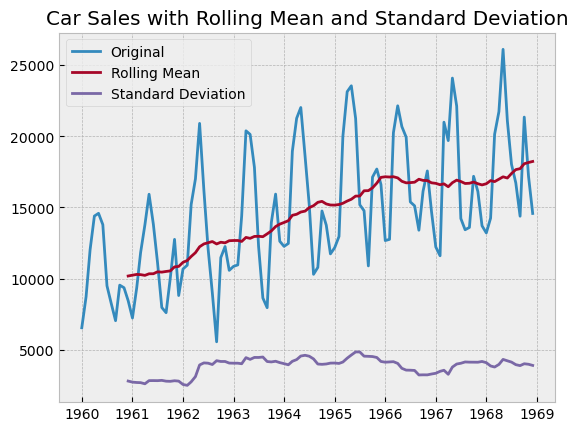

In [25]:
# Plot all above on single chart
orig = plt.plot(car_ts, label = "Original")
mean = plt.plot(rolmean, label = "Rolling Mean")
std = plt.plot(rolstd, label = "Standard Deviation")
plt.legend(loc = 'best')
plt.title('Car Sales with Rolling Mean and Standard Deviation')
plt.show()

In [26]:
# Analyse Data Year and Monthwise; Pivot table is a good option for this data
monthly_car=pd.pivot_table(car,values='Sales',columns='Year',index='Month')

In [27]:
monthly_car # index is out of order

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968
Month,,,,,,,,,
Apr,14395.0,13784.0,17010.0,20379.0,21259.0,23125.0,22135.0,19692.0,21725.0
Aug,8251.0,7975.0,8997.0,8642.0,10306.0,14767.0,15113.0,13434.0,16722.0
Dec,8456.0,8816.0,10583.0,12628.0,11738.0,16611.0,14720.0,13713.0,14577.0
Feb,8728.0,9374.0,10947.0,10965.0,12470.0,12965.0,12760.0,11608.0,14251.0
Jan,6550.0,7237.0,10677.0,10862.0,12267.0,12181.0,12674.0,12225.0,13210.0
Jul,9498.0,11143.0,12143.0,12268.0,15175.0,15189.0,15388.0,14220.0,18024.0
Jun,13791.0,13821.0,16205.0,17816.0,18581.0,21247.0,19933.0,22114.0,21084.0
Mar,12026.0,11837.0,15200.0,14405.0,18944.0,19990.0,20249.0,20985.0,20139.0
May,14587.0,15926.0,20900.0,20128.0,22015.0,23541.0,20677.0,24081.0,26099.0


In [28]:
# Re indexing month
monthly_car=monthly_car.reindex(index=['Jan','Feb','Mar','Apr','May',"Jun",'Jul','Aug','Sep','Oct','Nov','Dec'])
monthly_car

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968
Month,,,,,,,,,
Jan,6550.0,7237.0,10677.0,10862.0,12267.0,12181.0,12674.0,12225.0,13210.0
Feb,8728.0,9374.0,10947.0,10965.0,12470.0,12965.0,12760.0,11608.0,14251.0
Mar,12026.0,11837.0,15200.0,14405.0,18944.0,19990.0,20249.0,20985.0,20139.0
Apr,14395.0,13784.0,17010.0,20379.0,21259.0,23125.0,22135.0,19692.0,21725.0
May,14587.0,15926.0,20900.0,20128.0,22015.0,23541.0,20677.0,24081.0,26099.0
Jun,13791.0,13821.0,16205.0,17816.0,18581.0,21247.0,19933.0,22114.0,21084.0
Jul,9498.0,11143.0,12143.0,12268.0,15175.0,15189.0,15388.0,14220.0,18024.0
Aug,8251.0,7975.0,8997.0,8642.0,10306.0,14767.0,15113.0,13434.0,16722.0
Sep,7049.0,7610.0,5568.0,7962.0,10792.0,10895.0,13401.0,13598.0,14385.0


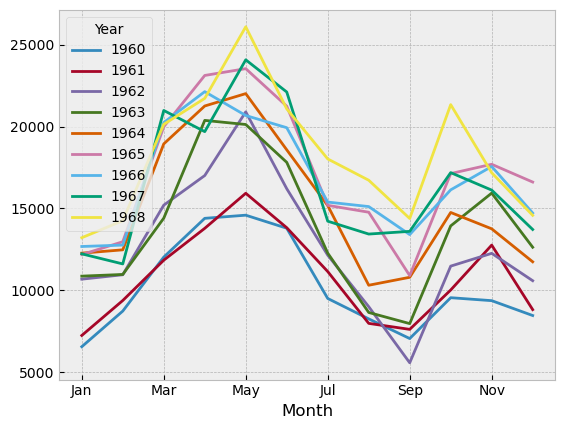

In [29]:
monthly_car.plot() ## Movement on monthly basis annualy. So, Let's pivot on Month
plt.show()

In [30]:
annual_car = pd.pivot_table(car, values = 'Sales', columns='Month', index='Year')

In [31]:
annual_car

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1960,14395.0,8251.0,8456.0,8728.0,6550.0,9498.0,13791.0,12026.0,14587.0,9364.0,9545.0,7049.0
1961,13784.0,7975.0,8816.0,9374.0,7237.0,11143.0,13821.0,11837.0,15926.0,12759.0,10015.0,7610.0
1962,17010.0,8997.0,10583.0,10947.0,10677.0,12143.0,16205.0,15200.0,20900.0,12256.0,11474.0,5568.0
1963,20379.0,8642.0,12628.0,10965.0,10862.0,12268.0,17816.0,14405.0,20128.0,15936.0,13932.0,7962.0
1964,21259.0,10306.0,11738.0,12470.0,12267.0,15175.0,18581.0,18944.0,22015.0,13754.0,14752.0,10792.0
1965,23125.0,14767.0,16611.0,12965.0,12181.0,15189.0,21247.0,19990.0,23541.0,17697.0,17130.0,10895.0
1966,22135.0,15113.0,14720.0,12760.0,12674.0,15388.0,19933.0,20249.0,20677.0,17562.0,16135.0,13401.0
1967,19692.0,13434.0,13713.0,11608.0,12225.0,14220.0,22114.0,20985.0,24081.0,16119.0,17187.0,13598.0
1968,21725.0,16722.0,14577.0,14251.0,13210.0,18024.0,21084.0,20139.0,26099.0,17180.0,21342.0,14385.0


In [32]:
annual_car = annual_car[['Jan','Feb','Mar','Apr','May',"Jun",'Jul','Aug','Sep','Oct','Nov','Dec']]
annual_car

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1960,6550.0,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0
1961,7237.0,9374.0,11837.0,13784.0,15926.0,13821.0,11143.0,7975.0,7610.0,10015.0,12759.0,8816.0
1962,10677.0,10947.0,15200.0,17010.0,20900.0,16205.0,12143.0,8997.0,5568.0,11474.0,12256.0,10583.0
1963,10862.0,10965.0,14405.0,20379.0,20128.0,17816.0,12268.0,8642.0,7962.0,13932.0,15936.0,12628.0
1964,12267.0,12470.0,18944.0,21259.0,22015.0,18581.0,15175.0,10306.0,10792.0,14752.0,13754.0,11738.0
1965,12181.0,12965.0,19990.0,23125.0,23541.0,21247.0,15189.0,14767.0,10895.0,17130.0,17697.0,16611.0
1966,12674.0,12760.0,20249.0,22135.0,20677.0,19933.0,15388.0,15113.0,13401.0,16135.0,17562.0,14720.0
1967,12225.0,11608.0,20985.0,19692.0,24081.0,22114.0,14220.0,13434.0,13598.0,17187.0,16119.0,13713.0
1968,13210.0,14251.0,20139.0,21725.0,26099.0,21084.0,18024.0,16722.0,14385.0,21342.0,17180.0,14577.0


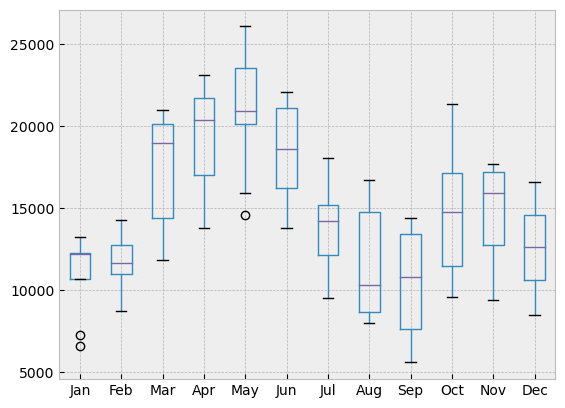

In [33]:
annual_car.boxplot()
plt.show()

Using non-stationary time series in regression models can lead to a high R-squared value and statistically significant regression coefficients. These results are very likely misleading or spurious.

It’s because there is probably no real relationship between them and the only common thing is that they’re growing or declining over time. 

When it comes to time series forecasting, the stationarity of a time series is one of the most important conditions that the majority of algorithms require. Briefly, time-series S_{t} is stationary (weak stationarity) if these conditions are met:
1. S_{t} has a constant mean.
2. S_{t} has a constant standard deviation.
3. There is no seasonality in S_{t}. If S_{t} has a repeating pattern within a year, then it has seasonality.

### Testing For Stationarity using adfuller
Augmented Dickey-Fuller Test (ADF) with the null hypothesis that the signal is non-stationary.

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
test_car=adfuller(car1['Sales'])

In [36]:
# Ho: It is non stationary
# H1: It is stationary

def adfuller_test(car_sale):
    result=adfuller(car_sale)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [37]:
adfuller_test(car1['Sales'])

ADF Test Statistic : -1.223812766175284
p-value : 0.6632691049832868
#Lags Used : 12
Number of Observations Used : 95
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


p value > 0.05 i.e its not sationary lets make it sattionary using Differencing method

# Differencing Method 

In [38]:
# 12 month therefore seasonal difference is shift(12)
car1['SeasonalDifferenceFirst'] = car1['Sales'] - car1['Sales'].shift(12)
car1.head(20)

C:\Users\sagar\AppData\Local\Temp\ipykernel_12648\3553703995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car1['SeasonalDifferenceFirst'] = car1['Sales'] - car1['Sales'].shift(12)


,Month,Year,Sales,SeasonalDifferenceFirst
1960-01-01,Jan,1960,6550,NaN
1960-02-01,Feb,1960,8728,NaN
1960-03-01,Mar,1960,12026,NaN
1960-04-01,Apr,1960,14395,NaN
1960-05-01,May,1960,14587,NaN
1960-06-01,Jun,1960,13791,NaN
1960-07-01,Jul,1960,9498,NaN
1960-08-01,Aug,1960,8251,NaN
1960-09-01,Sep,1960,7049,NaN
1960-10-01,Oct,1960,9545,NaN


In [39]:
## Again test dickey fuller test
adfuller_test(car1['SeasonalDifferenceFirst'].dropna())

ADF Test Statistic : -3.644396602406015
p-value : 0.004966833586579731
#Lags Used : 11
Number of Observations Used : 84
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: >

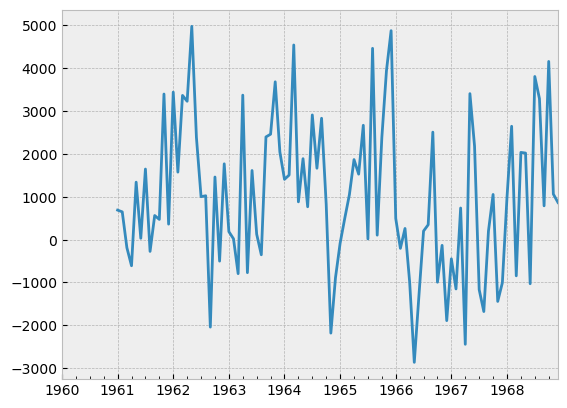

In [40]:
car1['SeasonalDifferenceFirst'].plot()

Hence our data is now stationary

### Decompose T-S

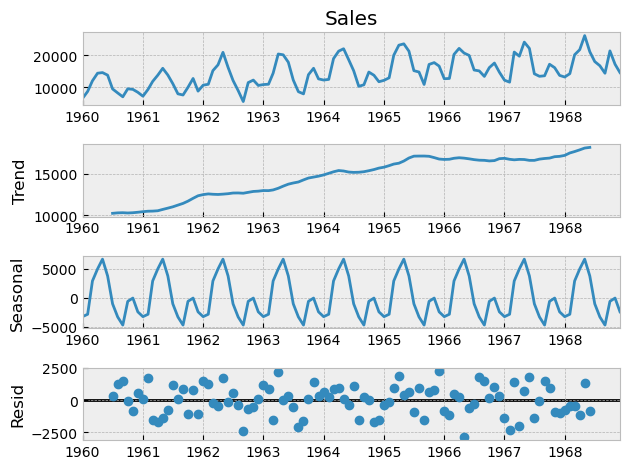

In [41]:
decomposition = sm.tsa.seasonal_decompose(car_ts,model='addititve')
fig = decomposition.plot()

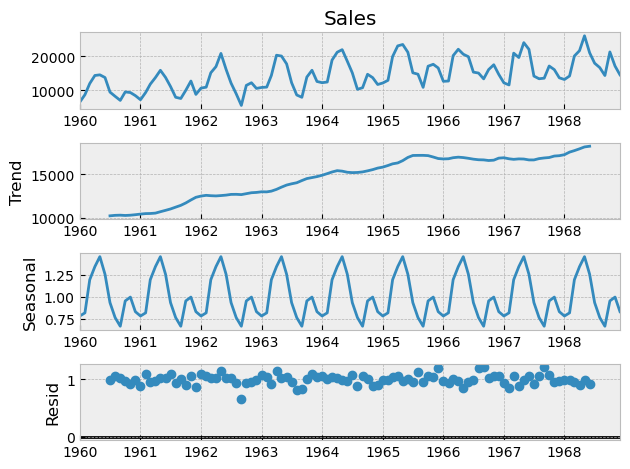

In [42]:
decomposition = sm.tsa.seasonal_decompose(car_ts,model='multiplicative')
fig = decomposition.plot()

# Looks like a multiplicative model since seasonal variation exists!
### Also, looks like stationarity(For AR ) and invertibility(For MA) exists in the data !!

#### We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data. But before using the SARIMA model, we will use the ARIMA model.

To use ARIMA or SARIMA, we need to find the p, d, and q values. We can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot. The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. 

As our data is seasonal, we should use 1 as the d value.

#### Now let’s find the value of p(AutoRegressive) and q (Moving Average) term:

In [44]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

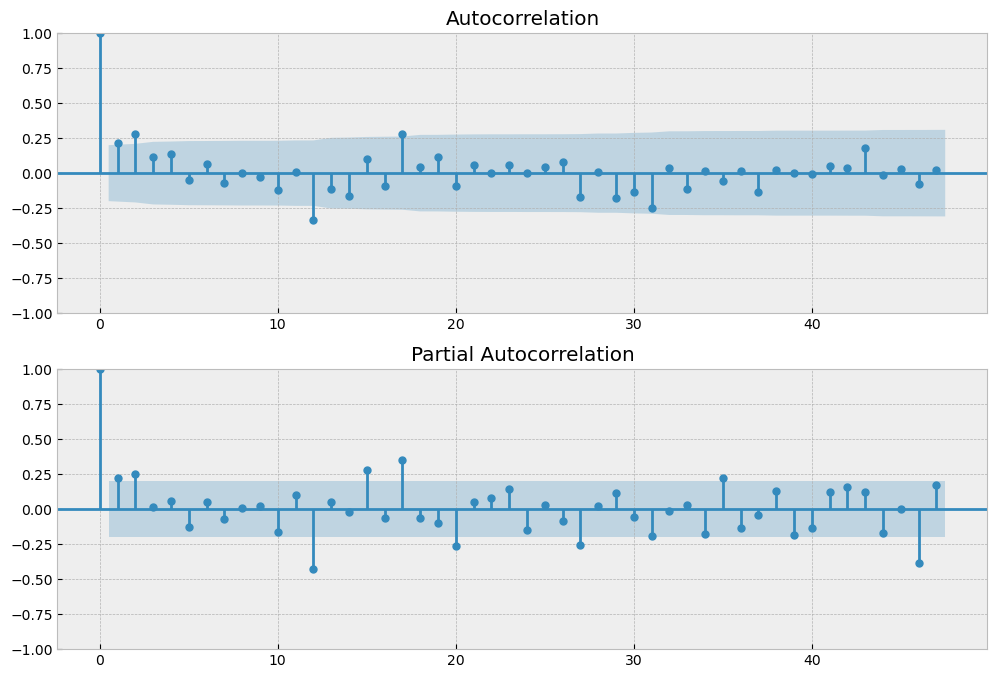

In [63]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(car1['SeasonalDifferenceFirst'].dropna(),lags=47,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(car1['SeasonalDifferenceFirst'].dropna(),lags=47,ax=ax2)

Take q or MA term as 1 as there is only 1 lag which is out of the blue band of AutoCorrelation Plot.

Take p or AR term as 3 as there is 3 lags which is out of the blue band of Partial AutoCorrelation Plot.

## Now let’s build an ARIMA model:

In [46]:
car1.head()

,Month,Year,Sales,SeasonalDifferenceFirst
1960-01-01,Jan,1960,6550,NaN
1960-02-01,Feb,1960,8728,NaN
1960-03-01,Mar,1960,12026,NaN
1960-04-01,Apr,1960,14395,NaN
1960-05-01,May,1960,14587,NaN


In [64]:
from statsmodels.tsa.arima.model import ARIMA
# Values of p will vary which is based on Partial AutoCorrelation Plot 
# if the lag in PACF Plot is far from the band we will increment our p term
# As for d if it is seasonal it will be 1 else 0
# And for q if the lag in ACF Plot is far from the band we will increment our q term but in above plot it is not.
# So for now q value is 1
p, d, q = 3, 1, 1

model = ARIMA(car1['Sales'], order=(p, d, q))
model_fit = model.fit()

#Model Summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  108
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1000.671
Date:                Fri, 29 Sep 2023   AIC                           2011.341
Time:                        04:21:26   BIC                           2024.706
Sample:                    01-01-1960   HQIC                          2016.759
                         - 12-01-1968                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7665      0.125      6.131      0.000       0.521       1.011
ar.L2         -0.1819      0.141     -1.294      0.196      -0.457       0.094
ar.L3         -0.2655      0.118     -2.245      0.025      -0.497      -0.034
ma.L1         -0.8925      0.068    -13.166      0.000      -1.025      -0.760
sigma2      8.735e+06   1.44e+06      6.057      0.000    5.91e+06    1.16e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.96   Prob(JB):                         0.42
Heteroskedasticity (H):               1.83   Skew:                             0.29
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AIC (Akaike Information Criteria)
It’s a statistical measure that we can use to compare different models for their relative quality. It measures the quality of the model in terms of its goodness-of-fit to the data, its simplicity, and how much it relies on the tuning parameters. The formula for AIC is

AIC = 2k - 2l

where l is a log-likelihood, and k is a number of parameters. For example, the AR(p) model has p+1 parameters. 
From the formula above, we can conclude that AIC prefers a higher log-likelihood that indicates how strong the model is in fitting the data and a simpler model in terms of parameters.

### Bayesian Information Criteria (BIC)
In addition to AIC, the BIC (Bayesian Information Criteria) uses one more indicator n that defines the number of samples used for fitting. The formula for BIC is

BIC = k log n - 2l

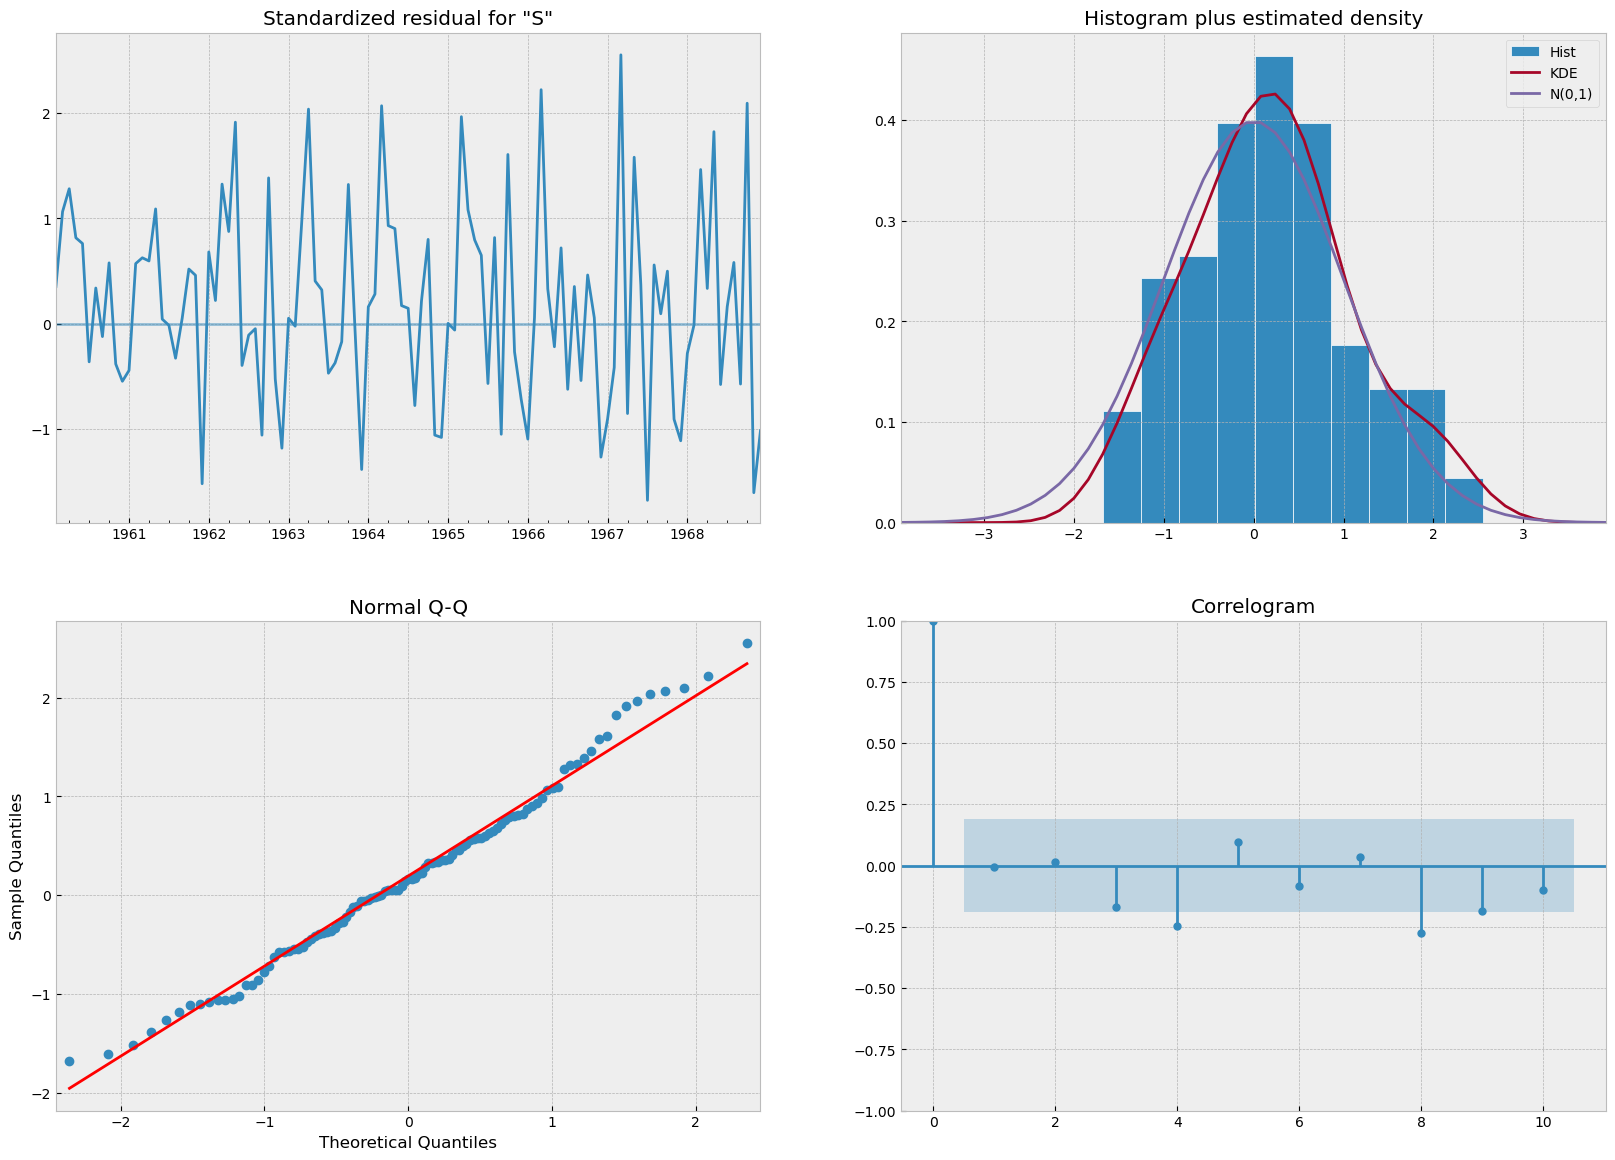

In [65]:
model_fit.plot_diagnostics(figsize=(20,14))
plt.show()

#### Predict the values using the ARIMA model:

In [66]:
predictions = model_fit.predict()
print(predictions)

1960-01-01        0.000000
1960-02-01     7482.092214
1960-03-01     8305.186081
1960-04-01    10177.892262
1960-05-01    11995.962992
                  ...     
1968-08-01    15002.749931
1968-09-01    16077.645888
1968-10-01    15153.562069
1968-11-01    21922.094795
1968-12-01    17577.382242
Freq: MS, Name: predicted_mean, Length: 108, dtype: float64


C:\Users\sagar\AppData\Local\Temp\ipykernel_12648\2853091689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car1['forecast']=model_fit.predict(start=20,end=100,dynamic=True)


<Axes: >

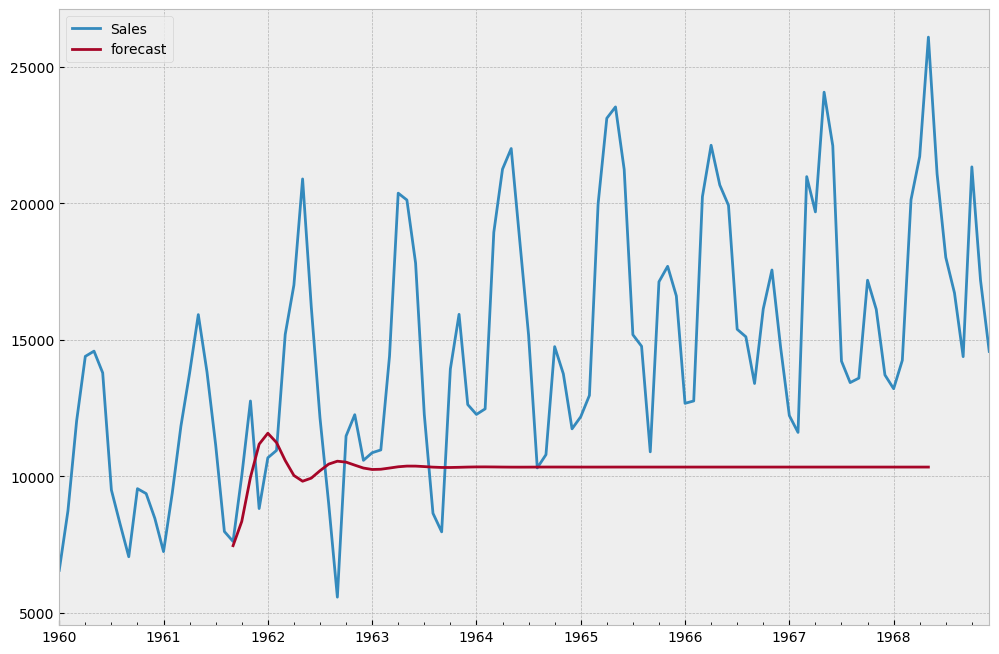

In [67]:
car1['forecast']=model_fit.predict(start=20,end=100,dynamic=True)
car1[['Sales','forecast']].plot(figsize=(12,8))

In [68]:
from sklearn.metrics import mean_squared_error
actual_values = car1['Sales'].values 
predicted_values = predictions
mse = mean_squared_error(actual_values, predicted_values)

rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.2f}")

RMSE: 2831.06


C:\Users\sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


### The predicted values are wrong because the data is seasonal. ARIMA model will never perform well on seasonal time series data. So, here’s how to build a SARIMA model:

In [69]:
import statsmodels.api as sm

In [70]:
model=sm.tsa.statespace.SARIMAX(car1['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -837.667
Date:                            Fri, 29 Sep 2023   AIC                           1685.335
Time:                                    04:21:31   BIC                           1698.104
Sample:                                01-01-1960   HQIC                          1690.494
                                     - 12-01-1968                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2093      0.123      1.696      0.090      -0.033       0.451
ma.L1         -0.8889      0.064    -13.983      0.000      -1.014      -0.764
ar.S.L12      -0.1785      0.258     -0.693      0.489      -0.684       0.327
ma.S.L12      -0.3129      0.267     -1.173      0.241      -0.836       0.210
sigma2      2.494e+06   4.02e+05      6.200      0.000    1.71e+06    3.28e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 1.14
Prob(Q):                              0.69   Prob(JB):                         0.57
Heteroskedasticity (H):               1.16   Skew:                             0.23
Prob(H) (two-sided):                  0.67   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

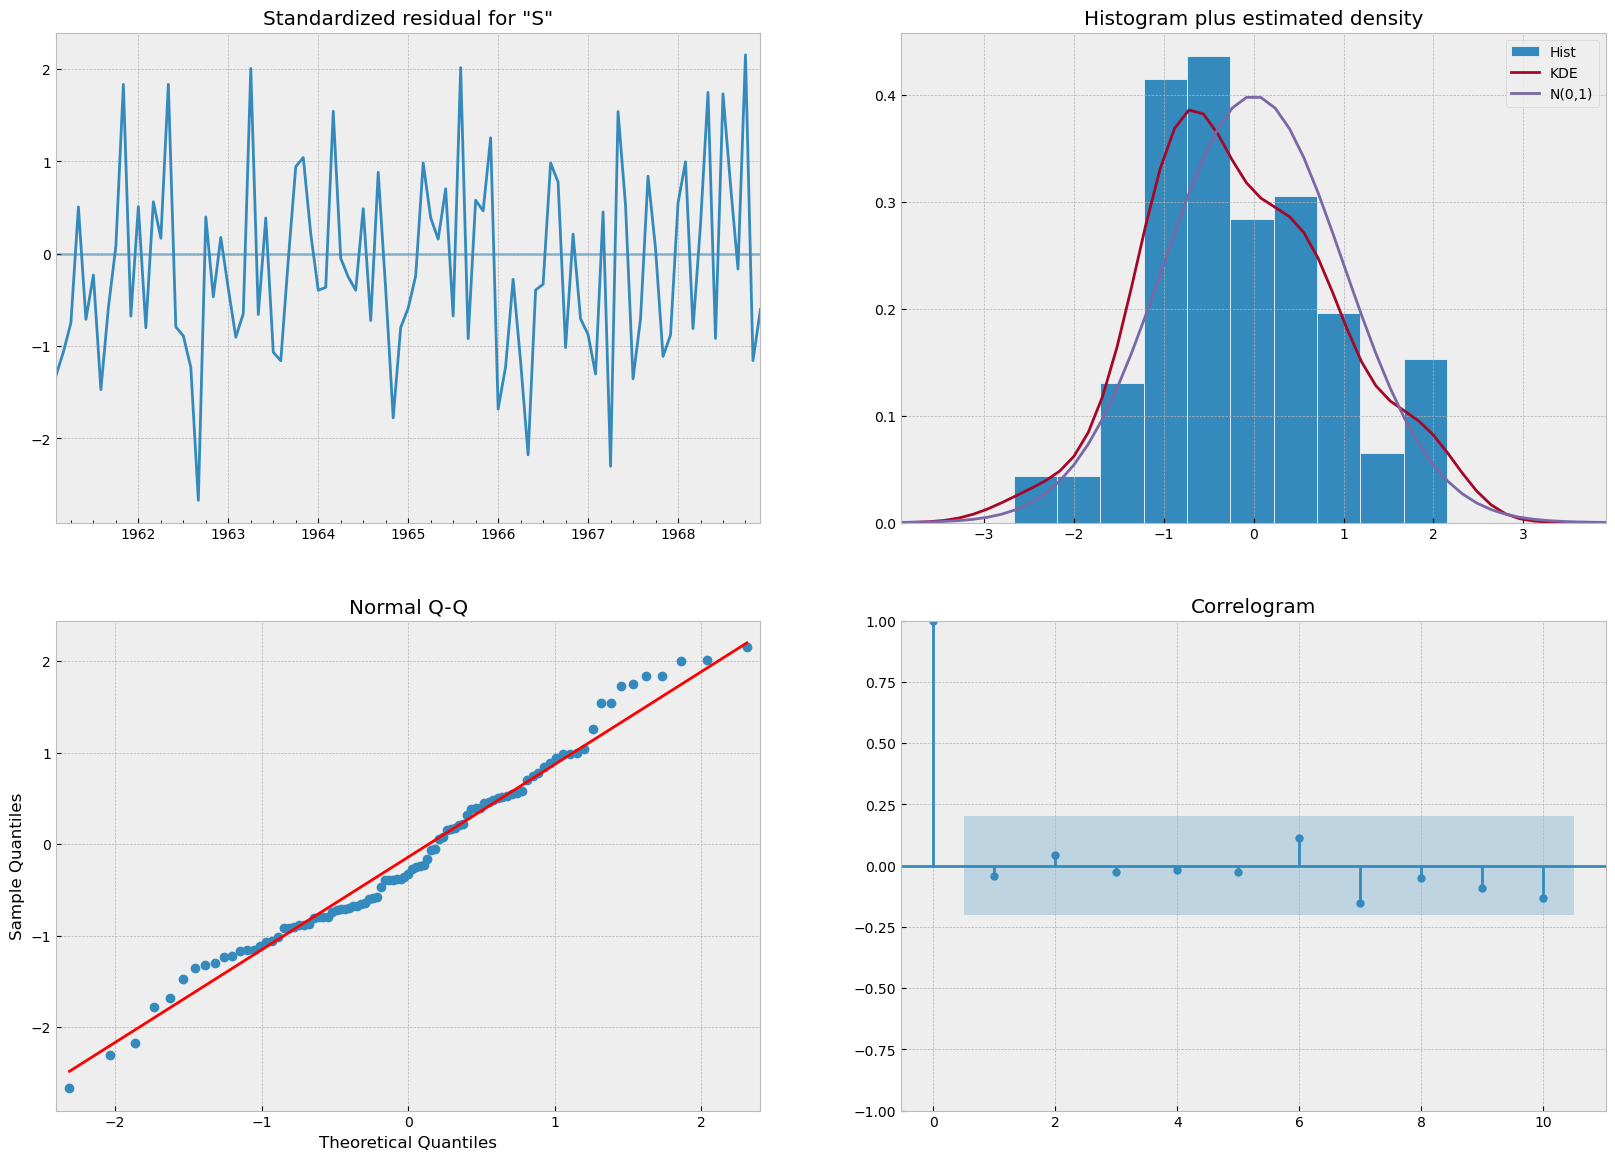

In [71]:
results.plot_diagnostics(figsize=(20,14))
plt.show()

In [72]:
predictions01 = results.predict()
print(predictions01)

1960-01-01        0.000000
1960-02-01     4766.550075
1960-03-01     6883.371004
1960-04-01     9584.328083
1960-05-01    11909.704134
                  ...     
1968-08-01    15537.906194
1968-09-01    14647.129198
1968-10-01    17940.968096
1968-11-01    19008.147836
1968-12-01    15527.087162
Freq: MS, Name: predicted_mean, Length: 108, dtype: float64


C:\Users\sagar\AppData\Local\Temp\ipykernel_12648\927392768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car1['forecast']=results.predict(start=77,end=100,dynamic=True)


<Axes: >

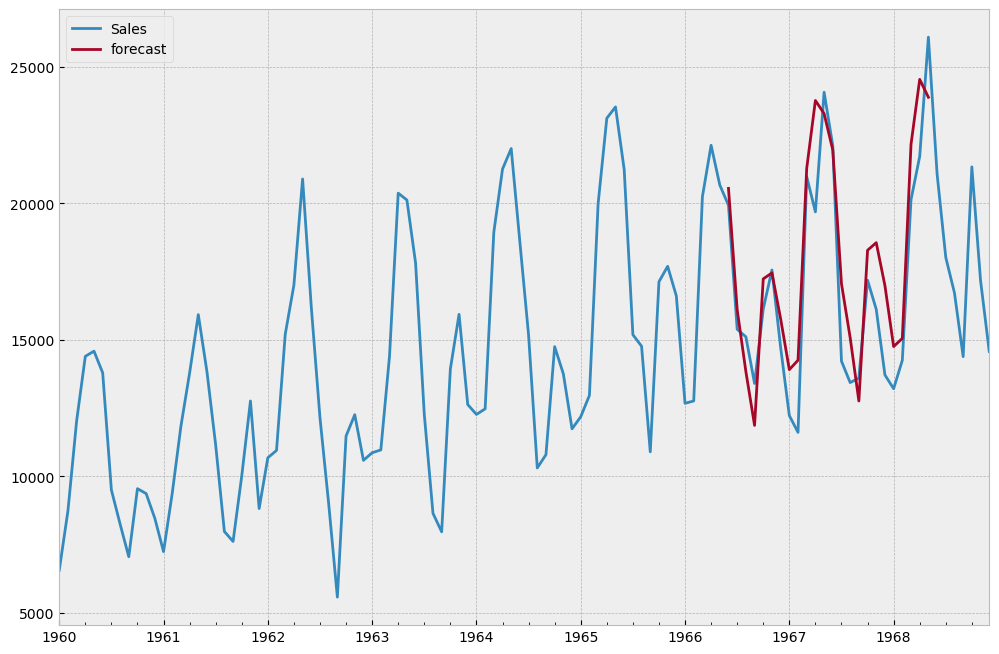

In [73]:
car1['forecast']=results.predict(start=77,end=100,dynamic=True)
car1[['Sales','forecast']].plot(figsize=(12,8))

In [74]:
from sklearn.metrics import mean_squared_error
actual_values = car1['Sales'].values 
predicted_values = predictions01
mse = mean_squared_error(actual_values, predicted_values)

rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.2f}")

RMSE: 2005.79


C:\Users\sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [75]:
car1.tail()

,Month,Year,Sales,SeasonalDifferenceFirst,forecast
1968-08-01,Aug,1968,16722,3288.0,NaN
1968-09-01,Sep,1968,14385,787.0,NaN
1968-10-01,Oct,1968,21342,4155.0,NaN
1968-11-01,Nov,1968,17180,1061.0,NaN
1968-12-01,Dec,1968,14577,864.0,NaN


In [76]:
car1.shape

(108, 5)

In [77]:
predictions2 = results.predict(len(car1), len(car1)+10)
print(predictions2)

1969-01-01    13880.392876
1969-02-01    14408.415045
1969-03-01    21711.351738
1969-04-01    22437.741643
1969-05-01    26017.038757
1969-06-01    22599.709304
1969-07-01    17639.001720
1969-08-01    16601.958356
1969-09-01    15158.951041
1969-10-01    20471.245635
1969-11-01    18161.292840
Freq: MS, Name: predicted_mean, dtype: float64


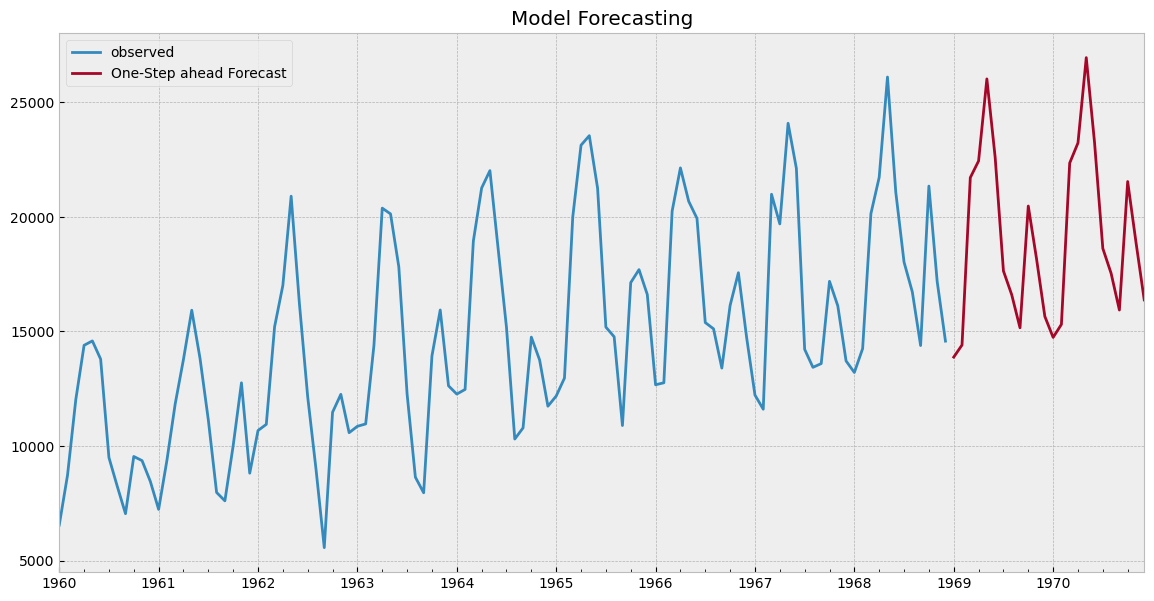

In [78]:
pred = results.get_prediction(start=pd.to_datetime('1969-01-01'),end = pd.to_datetime('1970-12-01'),dynamic = True)
ax=car1.Sales.plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-Step ahead Forecast',lw=2,alpha=1,figsize=(14,7))
plt.title('Model Forecasting')
plt.legend(loc='best')

Here we are done with our Forecast Model

# Note

As we increment our p term (AutoRegressive Term) our Arima model shows better result, less RMSE value, better Q-Q Plot and Standard Residual Plot than the previous result of the same model where we consider p term as 1 and 2 based on the count of lag consideration while plotiing PACF AND ACF Plot.

PACF and ACF Plot will consider only 50% of lags from samples and it is better to consider whole 50% for better p,q term.

As observed changing p term or AR term shows its effect on ARIMA model it doesn't show any effect on SARIMA Model may be its already a Seasonal Arima Model